In [1298]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [1299]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.metrics import precision_recall_curve
from sklearn.preprocessing import OneHotEncoder

In [1300]:
df=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/DT-BrainCancer.csv")

In [1301]:
df.head()

,Unnamed: 0,sex,diagnosis,loc,ki,gtv,status
0,1,Female,Meningioma,Infratentorial,90,6.11,0
1,2,Male,HG glioma,Supratentorial,90,19.35,1
2,3,Female,Meningioma,Infratentorial,70,7.95,0
3,4,Female,LG glioma,Supratentorial,80,7.61,1
4,5,Male,HG glioma,Supratentorial,90,5.06,1


In [1302]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88 entries, 0 to 87
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  88 non-null     int64  
 1   sex         88 non-null     object 
 2   diagnosis   87 non-null     object 
 3   loc         88 non-null     object 
 4   ki          88 non-null     int64  
 5   gtv         88 non-null     float64
 6   status      88 non-null     int64  
dtypes: float64(1), int64(3), object(3)
memory usage: 4.9+ KB


In [1303]:
df.describe()

,Unnamed: 0,ki,gtv,status
count,88.000000,88.000000,88.000000,88.000000
mean,44.500000,81.022727,8.660795,0.397727
std,25.547342,10.508866,8.657576,0.492233
min,1.000000,40.000000,0.010000,0.000000
25%,22.750000,80.000000,2.500000,0.000000
50%,44.500000,80.000000,6.510000,0.000000
75%,66.250000,90.000000,12.100000,1.000000
max,88.000000,100.000000,34.640000,1.000000


In [1304]:
df.count()

,0
Unnamed: 0,88
sex,88
diagnosis,87
loc,88
ki,88
gtv,88
status,88


In [1305]:
df.isnull().sum()

,0
Unnamed: 0,0
sex,0
diagnosis,1
loc,0
ki,0
gtv,0
status,0


In [1306]:
df = df.dropna()


In [1307]:
df.isnull().sum()

,0
Unnamed: 0,0
sex,0
diagnosis,0
loc,0
ki,0
gtv,0
status,0


In [1308]:
df.shape

(87, 7)

In [1309]:
df = df.drop('Unnamed: 0', axis=1)

In [1310]:
df.shape

(87, 6)

In [1311]:
df.head()

,sex,diagnosis,loc,ki,gtv,status
0,Female,Meningioma,Infratentorial,90,6.11,0
1,Male,HG glioma,Supratentorial,90,19.35,1
2,Female,Meningioma,Infratentorial,70,7.95,0
3,Female,LG glioma,Supratentorial,80,7.61,1
4,Male,HG glioma,Supratentorial,90,5.06,1


In [1312]:
un = df['sex'].unique()
print(un)

['Female' 'Male']


In [1313]:
un = df['diagnosis'].unique()
print(un)

['Meningioma' 'HG glioma' 'LG glioma' 'Other']


In [1314]:
un = df['loc'].unique()
print(un)

['Infratentorial' 'Supratentorial']


In [1315]:
categorical = df.select_dtypes(include=['object']).columns
numerical = df.select_dtypes(exclude=['object']).columns

In [1316]:
print(categorical)
print(numerical)

Index(['sex', 'diagnosis', 'loc'], dtype='object')
Index(['ki', 'gtv', 'status'], dtype='object')


In [1317]:
encoder = OneHotEncoder(drop='first', sparse_output=False)
encoded_data = encoder.fit_transform(df[categorical])
encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(categorical))
encoded_df.index = df.index

In [1318]:
df = df.drop(categorical, axis=1)
df = pd.concat([df, encoded_df], axis=1)

In [1319]:
X = df.drop(columns=['status'])
y = df['status']

In [1320]:
print(X.shape)
print(y.shape)

(87, 7)
(87,)


In [1321]:
X.head()

,ki,gtv,sex_Male,diagnosis_LG glioma,diagnosis_Meningioma,diagnosis_Other,loc_Supratentorial
0,90,6.11,0.0,0.0,1.0,0.0,0.0
1,90,19.35,1.0,0.0,0.0,0.0,1.0
2,70,7.95,0.0,0.0,1.0,0.0,0.0
3,80,7.61,0.0,1.0,0.0,0.0,1.0
4,90,5.06,1.0,0.0,0.0,0.0,1.0


In [1322]:
y.head()

,status
0,0
1,1
2,0
3,1
4,1


In [1323]:
corr = df.corr()

target = corr['status'].sort_values(ascending=False)

print("Correlation of each feature with the target variable (status):")
print(target)

Correlation of each feature with the target variable (status):
status                  1.000000
gtv                     0.232762
loc_Supratentorial      0.206725
sex_Male                0.145578
diagnosis_LG glioma     0.029195
diagnosis_Other        -0.040328
ki                     -0.251298
diagnosis_Meningioma   -0.370416
Name: status, dtype: float64


In [1324]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [1325]:
X_train, X_temp, y_train, y_temp = train_test_split(X_scaled, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [1326]:
print(X_train.shape)
print(X_val.shape)
print(X_test.shape)
print(y_train.shape)
print(y_val.shape)
print(y_test.shape)

(60, 7)
(13, 7)
(14, 7)
(60,)
(13,)
(14,)


In [1327]:
def accuracy(y_true, y_pred):
    return np.sum(y_true == y_pred) / len(y_true)

def confusion_matrix_manual(y_true, y_pred):
    tp = np.sum((y_true == 1) & (y_pred == 1))
    tn = np.sum((y_true == 0) & (y_pred == 0))
    fp = np.sum((y_true == 0) & (y_pred == 1))
    fn = np.sum((y_true == 1) & (y_pred == 0))
    return tp, tn, fp, fn

def confusion_matrix(y_true, y_pred):
    tp = np.sum((y_true == 1) & (y_pred == 1))
    tn = np.sum((y_true == 0) & (y_pred == 0))
    fp = np.sum((y_true == 0) & (y_pred == 1))
    fn = np.sum((y_true == 1) & (y_pred == 0))
    return np.array([[tn, fp], [fn, tp]])

def precision_manual(y_true, y_pred, average=None):
    tp, tn, fp, fn = confusion_matrix_manual(y_true, y_pred)
    if average == "weighted":
        total = len(y_true)
        class_1_weight = np.sum(y_true == 1) / total
        class_0_weight = np.sum(y_true == 0) / total
        precision_class_1 = tp / (tp + fp) if tp + fp > 0 else 0
        precision_class_0 = tn / (tn + fn) if tn + fn > 0 else 0
        return class_1_weight * precision_class_1 + class_0_weight * precision_class_0
    return tp / (tp + fp) if tp + fp > 0 else 0

def recall_manual(y_true, y_pred, average=None):
    tp, tn, fp, fn = confusion_matrix_manual(y_true, y_pred)
    if average == "weighted":
        total = len(y_true)
        class_1_weight = np.sum(y_true == 1) / total
        class_0_weight = np.sum(y_true == 0) / total
        recall_class_1 = tp / (tp + fn) if tp + fn > 0 else 0
        recall_class_0 = tn / (tn + fp) if tn + fp > 0 else 0
        return class_1_weight * recall_class_1 + class_0_weight * recall_class_0
    return tp / (tp + fn) if tp + fn > 0 else 0

def f1_score_manual(y_true, y_pred, average=None):
    tp, tn, fp, fn = confusion_matrix_manual(y_true, y_pred)

    if average == "weighted":
        total = len(y_true)
        class_1_weight = np.sum(y_true == 1) / total
        class_0_weight = np.sum(y_true == 0) / total

        precision_class_1 = tp / (tp + fp) if tp + fp > 0 else 0
        recall_class_1 = tp / (tp + fn) if tp + fn > 0 else 0
        precision_class_0 = tn / (tn + fn) if tn + fn > 0 else 0
        recall_class_0 = tn / (tn + fp) if tn + fp > 0 else 0

        f1_class_1 = (
            2 * (precision_class_1 * recall_class_1) / (precision_class_1 + recall_class_1)
            if precision_class_1 + recall_class_1 > 0
            else 0
        )
        f1_class_0 = (
            2 * (precision_class_0 * recall_class_0) / (precision_class_0 + recall_class_0)
            if precision_class_0 + recall_class_0 > 0
            else 0
        )

        return class_1_weight * f1_class_1 + class_0_weight * f1_class_0

    precision = precision_manual(y_true, y_pred)
    recall = recall_manual(y_true, y_pred)
    return 2 * (precision * recall) / (precision + recall) if precision + recall > 0 else 0


def precision_recall_curve_manual(y_true, y_prob):
    precision, recall, thresholds = precision_recall_curve(y_true, y_prob)
    return precision, recall, thresholds

def plot_precision_recall_curve(precision, recall, label):
    plt.plot(recall, precision, label=label)
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall Curve')
    plt.legend()
    plt.show()


## ZeroR Classifier


In [1328]:
majority_class = y_train.mode()[0]
print(f"Majority class (ZeroR prediction): {majority_class}")

Majority class (ZeroR prediction): 0


In [1329]:
y_val_pred = np.full_like(y_val, majority_class)
y_test_pred = np.full_like(y_test, majority_class)

In [1330]:
accuracy_val_custom = accuracy(y_val, y_val_pred)
precision_val_custom = precision_manual(y_val, y_val_pred)
recall_val_custom = recall_manual(y_val, y_val_pred)
f1_val_custom = f1_score_manual(y_val, y_val_pred)

accuracy_test_custom = accuracy(y_test, y_test_pred)
precision_test_custom = precision_manual(y_test, y_test_pred)
recall_test_custom = recall_manual(y_test, y_test_pred)
f1_test_custom = f1_score_manual(y_test, y_test_pred)


In [1331]:
def custom_auc(precision, recall):
    auc_value = np.trapz(precision, recall)
    return auc_value


y_test_prob = np.full_like(y_test, majority_class, dtype=float)
y_test_prob = np.where(y_test == majority_class, 1.0, 0.0)

precision_vals, recall_vals, thresholds = precision_recall_curve(y_test, y_test_prob)
pr_auc = custom_auc(recall_vals, precision_vals)


In [1332]:
print("\nValidation Set Metrics (Custom):")
print(f"Accuracy: {accuracy_val_custom}")
print(f"Precision: {precision_val_custom}")
print(f"Recall: {recall_val_custom}")
print(f"F1-Score: {f1_val_custom}")

print("\nTest Set Metrics (Custom):")
print(f"Accuracy: {accuracy_test_custom}")
print(f"Precision: {precision_test_custom}")
print(f"Recall: {recall_test_custom}")
print(f"F1-Score: {f1_test_custom}")
print(f"Precision-Recall AUC: {pr_auc}")



Validation Set Metrics (Custom):
Accuracy: 0.6923076923076923
Precision: 0
Recall: 0.0
F1-Score: 0

Test Set Metrics (Custom):
Accuracy: 0.6428571428571429
Precision: 0
Recall: 0.0
F1-Score: 0
Precision-Recall AUC: -0.17857142857142858


In [1333]:
tp_val, tn_val, fp_val, fn_val = confusion_matrix_manual(y_val, y_val_pred)
tp_test, tn_test, fp_test, fn_test = confusion_matrix_manual(y_test, y_test_pred)

print("\nValidation Set Confusion Matrix (Custom):")
print(f"TP: {tp_val}, TN: {tn_val}, FP: {fp_val}, FN: {fn_val}")

print("\nTest Set Confusion Matrix (Custom):")
print(f"TP: {tp_test}, TN: {tn_test}, FP: {fp_test}, FN: {fn_test}")



Validation Set Confusion Matrix (Custom):
TP: 0, TN: 9, FP: 0, FN: 4

Test Set Confusion Matrix (Custom):
TP: 0, TN: 9, FP: 0, FN: 5


In [1334]:
conf_matrix = confusion_matrix(y_test, y_test_pred)
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[9 0]
 [5 0]]


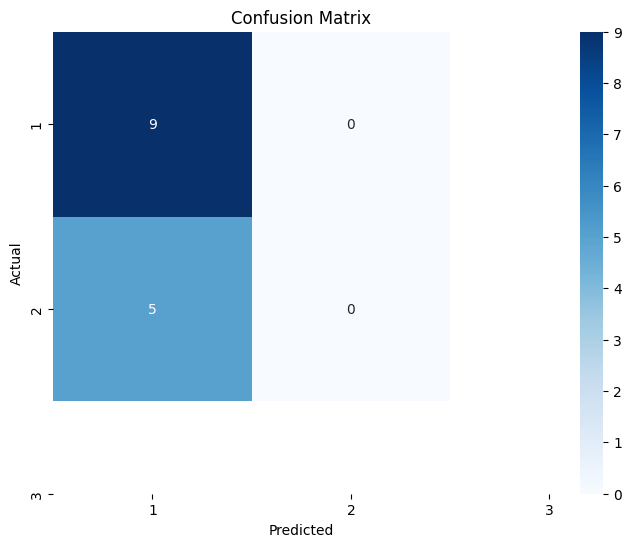

In [1335]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=[1, 2, 3], yticklabels=[1, 2, 3])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

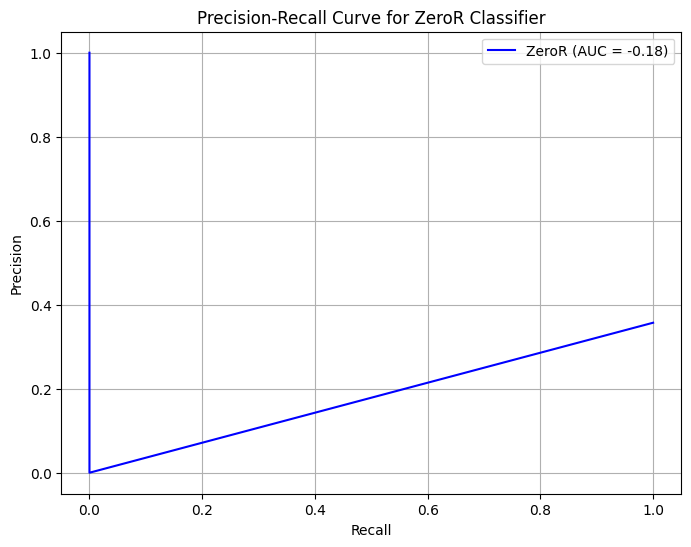

In [1336]:
plt.figure(figsize=(8, 6))
plt.plot(recall_vals, precision_vals, label=f"ZeroR (AUC = {pr_auc:.2f})", color="blue")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve for ZeroR Classifier")
plt.legend(loc="best")
plt.grid()
plt.show()


## OneR Classifier

In [1337]:
def oneR_classifier(X_train, y_train):
    best_accuracy = 0
    best_feature = None
    best_threshold = None

    for feature_idx in range(X_train.shape[1]):
        feature_values = X_train[:, feature_idx]
        thresholds = np.unique(feature_values)

        for threshold in thresholds:
            predicted = (feature_values >= threshold).astype(int)
            accuracy = np.mean(predicted == y_train)

            if accuracy > best_accuracy:
                best_accuracy = accuracy
                best_feature = feature_idx
                best_threshold = threshold

    best_feature_values = X_train[:, best_feature]
    predictions = (best_feature_values >= best_threshold).astype(int)

    return predictions, best_feature, best_threshold

In [1338]:
y_train_pred, best_feature, best_threshold = oneR_classifier(X_train, y_train)

In [1339]:
best_feature_values_val = X_val[:, best_feature]

In [1340]:
y_val_pred = (best_feature_values_val >= best_threshold).astype(int)

In [1341]:
accuracy_val = accuracy(y_val, y_val_pred)
conf_matrix_val = confusion_matrix_manual(y_val, y_val_pred)
precision_val = precision_manual(y_val, y_val_pred)
recall_val = recall_manual(y_val, y_val_pred)
f1_val = f1_score_manual(y_val, y_val_pred)

print("\nValidation Set Metrics:")
print(f"Accuracy: {accuracy_val}")
print(f"Confusion Matrix (TP, TN, FP, FN): {conf_matrix_val}")
print(f"Precision: {precision_val}")
print(f"Recall: {recall_val}")
print(f"F1-Score: {f1_val}")


Validation Set Metrics:
Accuracy: 0.6923076923076923
Confusion Matrix (TP, TN, FP, FN): (1, 8, 1, 3)
Precision: 0.5
Recall: 0.25
F1-Score: 0.3333333333333333


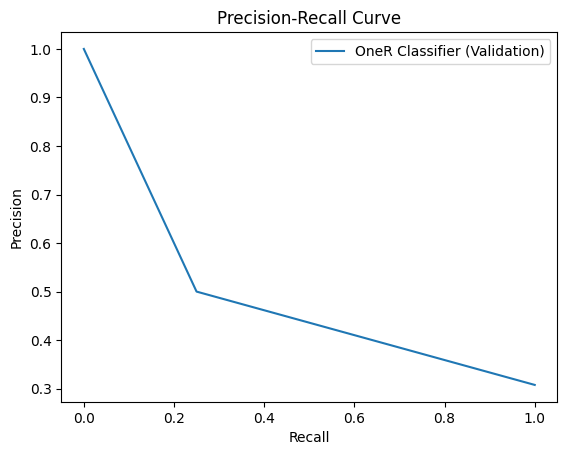

In [1342]:
y_val_prob = y_val_pred
precision_vals, recall_vals, _ = precision_recall_curve_manual(y_val, y_val_prob)
plot_precision_recall_curve(precision_vals, recall_vals, label="OneR Classifier (Validation)")

In [1343]:
best_feature_values_test = X_test[:, best_feature]
y_test_pred = (best_feature_values_test >= best_threshold).astype(int)

accuracy_test = accuracy(y_test, y_test_pred)
conf_matrix_test = confusion_matrix_manual(y_test, y_test_pred)
precision_test = precision_manual(y_test, y_test_pred)
recall_test = recall_manual(y_test, y_test_pred)
f1_test = f1_score_manual(y_test, y_test_pred)

print("\nTest Set Metrics:")
print(f"Accuracy: {accuracy_test}")
print(f"Confusion Matrix (TP, TN, FP, FN): {conf_matrix_test}")
print(f"Precision: {precision_test}")
print(f"Recall: {recall_test}")
print(f"F1-Score: {f1_test}")


Test Set Metrics:
Accuracy: 0.7857142857142857
Confusion Matrix (TP, TN, FP, FN): (2, 9, 0, 3)
Precision: 1.0
Recall: 0.4
F1-Score: 0.5714285714285715


In [1344]:
conf_matrix = confusion_matrix(y_test, y_test_pred)
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[9 0]
 [3 2]]


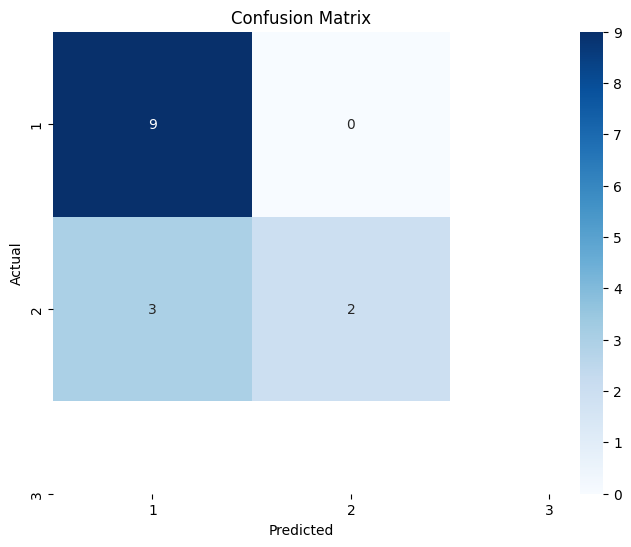

In [1345]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=[1, 2, 3], yticklabels=[1, 2, 3])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

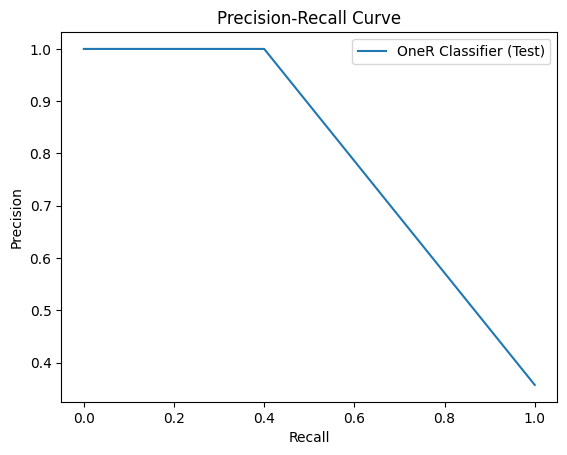

In [1346]:
y_test_prob = y_test_pred
precision_vals, recall_test, _ = precision_recall_curve_manual(y_test, y_test_prob)
plot_precision_recall_curve(precision_vals, recall_test, label="OneR Classifier (Test)")

## K-Nearest-Neighbor Classifiers


In [1347]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)

In [1348]:
knn.fit(X_train, y_train)
y_val_pred = knn.predict(X_val)

In [1349]:
accuracy_val = accuracy(y_val, y_val_pred)
precision_val = precision_manual(y_val, y_val_pred, average='weighted')
recall_val = recall_manual(y_val, y_val_pred, average='weighted')
f1_val = f1_score_manual(y_val, y_val_pred, average='weighted')

In [1350]:
print(f"Validation Accuracy: {accuracy_val}")
print(f"Validation Precision: {precision_val}")
print(f"Validation Recall: {recall_val}")
print(f"Validation F1 Score: {f1_val}")

Validation Accuracy: 0.6923076923076923
Validation Precision: 0.6923076923076923
Validation Recall: 0.6923076923076923
Validation F1 Score: 0.6923076923076923


In [1351]:
y_test_pred = knn.predict(X_test)
accuracy_test = accuracy(y_test, y_test_pred)
precision_test = precision_manual(y_test, y_test_pred, average='weighted')
recall_test = recall_manual(y_test, y_test_pred, average='weighted')
f1_test = f1_score_manual(y_test, y_test_pred, average='weighted')


In [1352]:
print(f"Test Accuracy: {accuracy_test}")
print(f"Test Precision: {precision_test}")
print(f"Test Recall: {recall_test}")
print(f"Test F1 Score: {f1_test}")

Test Accuracy: 0.9285714285714286
Test Precision: 0.9404761904761905
Test Recall: 0.9285714285714286
Test F1 Score: 0.9297173414820474


In [1353]:
conf_matrix = confusion_matrix(y_test, y_test_pred)
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[8 1]
 [0 5]]


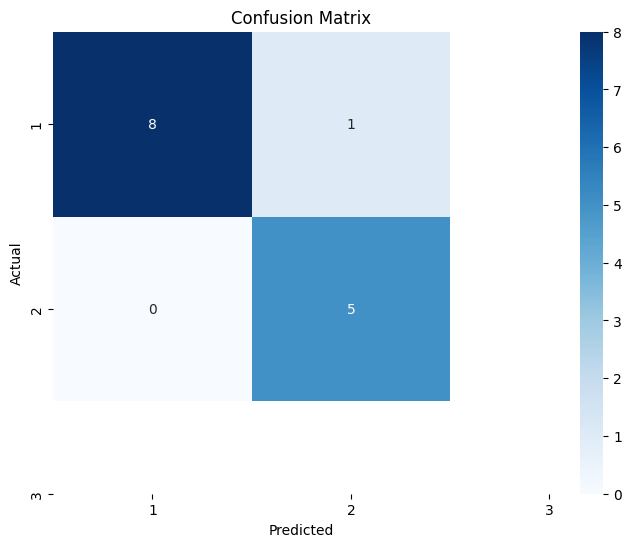

In [1354]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=[1, 2, 3], yticklabels=[1, 2, 3])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [1355]:
from sklearn.metrics import roc_curve, auc

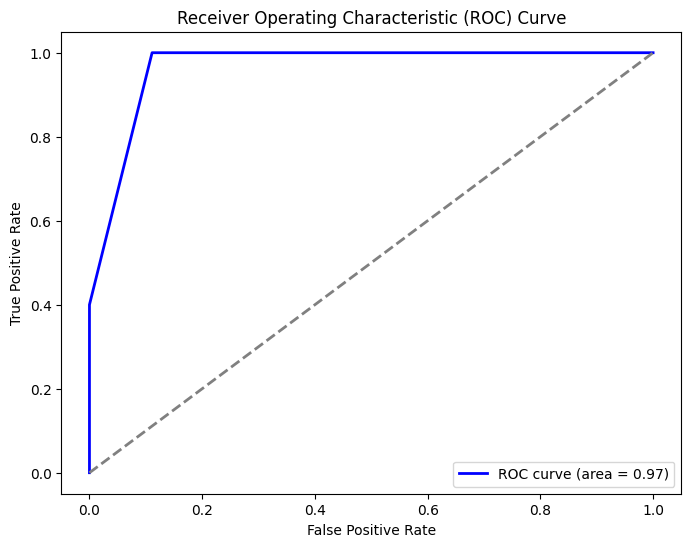

In [1356]:
fpr, tpr, thresholds = roc_curve(y_test, knn.predict_proba(X_test)[:, 1], pos_label=1)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f"ROC curve (area = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


In [1357]:
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

In [1358]:
grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

print("Best Parameters from Grid Search:")
print(grid_search.best_params_)
print(f"Best Accuracy from Grid Search: {grid_search.best_score_}")

best_knn = grid_search.best_estimator_

y_test_pred_best = best_knn.predict(X_test)

accuracy_best = accuracy(y_test, y_test_pred_best)
precision_best = precision_manual(y_test, y_test_pred_best, average='weighted')
recall_best = recall_manual(y_test, y_test_pred_best, average='weighted')
f1_best = f1_score_manual(y_test, y_test_pred_best, average='weighted')

Best Parameters from Grid Search:
{'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'uniform'}
Best Accuracy from Grid Search: 0.6666666666666666


In [1359]:

print(f"Test Accuracy (Best K-NN): {accuracy_best}")
print(f"Test Precision (Best K-NN): {precision_best}")
print(f"Test Recall (Best K-NN): {recall_best}")
print(f"Test F1 Score (Best K-NN): {f1_best}")

Test Accuracy (Best K-NN): 0.9285714285714286
Test Precision (Best K-NN): 0.9404761904761905
Test Recall (Best K-NN): 0.9285714285714286
Test F1 Score (Best K-NN): 0.9297173414820474


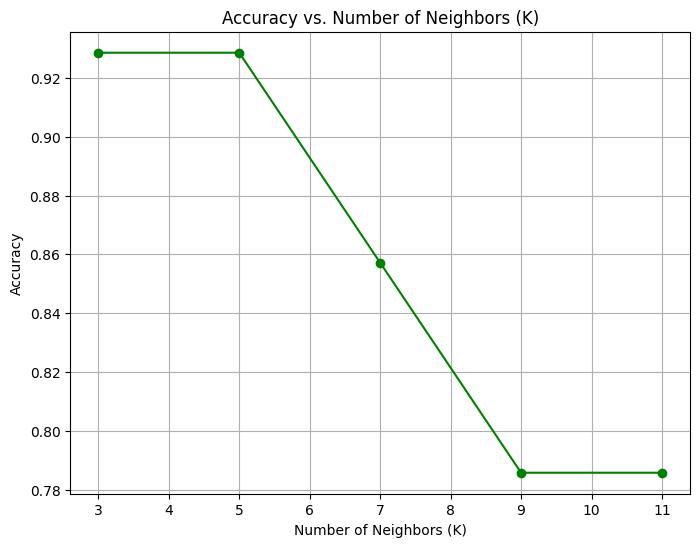

In [1360]:
k_values = [3, 5, 7, 9, 11]
accuracies = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracies.append(accuracy(y_test, y_pred))

plt.figure(figsize=(8, 6))
plt.plot(k_values, accuracies, marker='o', color='green')
plt.title('Accuracy vs. Number of Neighbors (K)')
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()


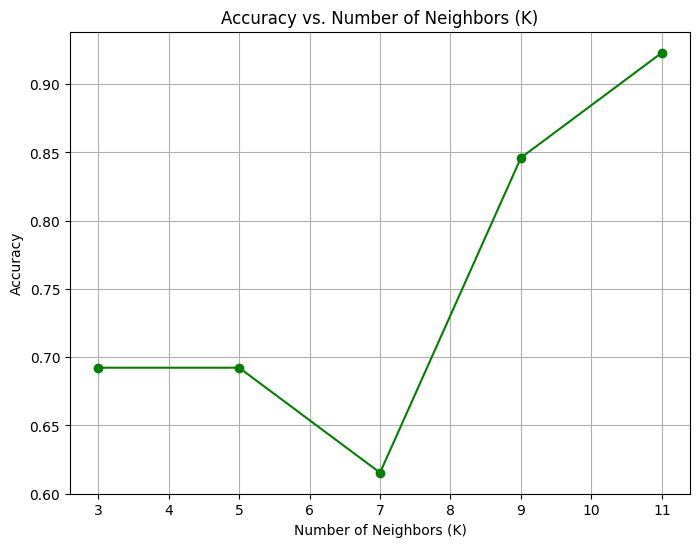

In [1361]:
k_values = [3, 5, 7, 9, 11]
accuracies = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_val_pred = knn.predict(X_val)
    accuracies.append(accuracy(y_val, y_val_pred))

plt.figure(figsize=(8, 6))
plt.plot(k_values, accuracies, marker='o', color='green')
plt.title('Accuracy vs. Number of Neighbors (K)')
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()


## Naive Bayesian Classifier


In [1362]:
from sklearn.naive_bayes import GaussianNB

In [1363]:
nb = GaussianNB()
nb.fit(X_train, y_train)

GaussianNB()

In [1364]:
y_val_pred = nb.predict(X_val)
y_test_pred = nb.predict(X_test)
y_test_pred = nb.predict(X_test)

In [1365]:
accuracy_val = accuracy(y_val, y_val_pred)
precision_val = precision_manual(y_val, y_val_pred, average='weighted')
recall_val = recall_manual(y_val, y_val_pred, average='weighted')
f1_val = f1_score_manual(y_val, y_val_pred, average='weighted')


In [1366]:
print(f"Validation Accuracy: {accuracy_val}")
print(f"Validation Precision: {precision_val}")
print(f"Validation Recall: {recall_val}")
print(f"Validation F1 Score: {f1_val}")

Validation Accuracy: 0.7692307692307693
Validation Precision: 0.7589743589743589
Validation Recall: 0.7692307692307692
Validation F1 Score: 0.75882012724118


In [1367]:
accuracy_test = accuracy(y_test, y_test_pred)
precision_test = precision_manual(y_test, y_test_pred, average='weighted')
recall_test = recall_manual(y_test, y_test_pred, average='weighted')
f1_test = f1_score_manual(y_test, y_test_pred, average='weighted')


In [1368]:
print(f"Test Accuracy: {accuracy_test}")
print(f"Test Precision: {precision_test}")
print(f"Test Recall: {recall_test}")
print(f"Test F1 Score: {f1_test}")


Test Accuracy: 0.7857142857142857
Test Precision: 0.8005952380952381
Test Recall: 0.7857142857142858
Test F1 Score: 0.7891520244461422


In [1369]:
conf_matrix = confusion_matrix(y_test, y_test_pred)
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[7 2]
 [1 4]]


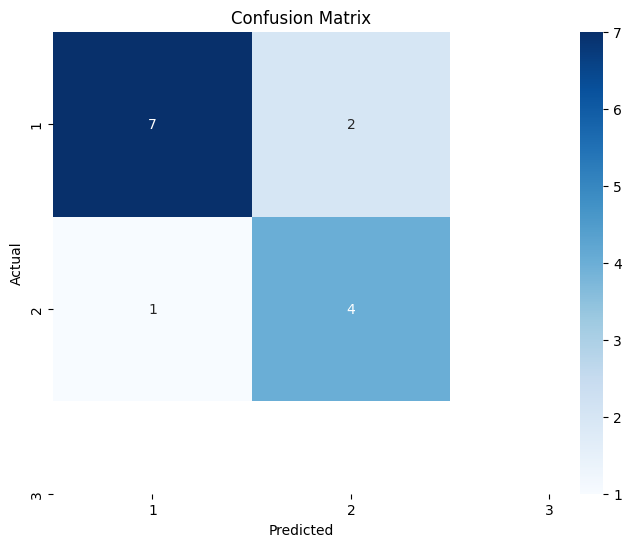

In [1370]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=[1, 2, 3], yticklabels=[1, 2, 3])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [1371]:
accuracy_test = accuracy(y_test, y_test_pred)
precision_test = precision_manual(y_test, y_test_pred, average='weighted')
recall_test = recall_manual(y_test, y_test_pred, average='weighted')
f1_test = f1_score_manual(y_test, y_test_pred, average='weighted')

print(f"Test Accuracy (Naive Bayes): {accuracy_test}")
print(f"Test Precision (Naive Bayes): {precision_test}")
print(f"Test Recall (Naive Bayes): {recall_test}")
print(f"Test F1 Score (Naive Bayes): {f1_test}")

Test Accuracy (Naive Bayes): 0.7857142857142857
Test Precision (Naive Bayes): 0.8005952380952381
Test Recall (Naive Bayes): 0.7857142857142858
Test F1 Score (Naive Bayes): 0.7891520244461422


## SVC

In [1372]:
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline

In [1373]:
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('svc', SVC(probability=True))
])

param_grid = {
    'svc__C': [0.01, 0.1, 1, 10, 100],
    'svc__kernel': ['linear', 'rbf'],
    'svc__gamma': ['scale', 0.001, 0.01, 0.1, 1]
}

grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='roc_auc', verbose=2)
grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_

print("Best Parameters:", grid_search.best_params_)
print("Best ROC-AUC Score:", grid_search.best_score_)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV] END ..svc__C=0.01, svc__gamma=scale, svc__kernel=linear; total time=   0.0s
[CV] END ..svc__C=0.01, svc__gamma=scale, svc__kernel=linear; total time=   0.0s
[CV] END ..svc__C=0.01, svc__gamma=scale, svc__kernel=linear; total time=   0.0s
[CV] END ..svc__C=0.01, svc__gamma=scale, svc__kernel=linear; total time=   0.0s
[CV] END ..svc__C=0.01, svc__gamma=scale, svc__kernel=linear; total time=   0.0s
[CV] END .....svc__C=0.01, svc__gamma=scale, svc__kernel=rbf; total time=   0.0s
[CV] END .....svc__C=0.01, svc__gamma=scale, svc__kernel=rbf; total time=   0.0s
[CV] END .....svc__C=0.01, svc__gamma=scale, svc__kernel=rbf; total time=   0.0s
[CV] END .....svc__C=0.01, svc__gamma=scale, svc__kernel=rbf; total time=   0.0s
[CV] END .....svc__C=0.01, svc__gamma=scale, svc__kernel=rbf; total time=   0.0s
[CV] END ..svc__C=0.01, svc__gamma=0.001, svc__kernel=linear; total time=   0.0s
[CV] END ..svc__C=0.01, svc__gamma=0.001, svc__

In [1374]:
# svm.fit(X_train, y_train)
y_test_pred_svm = best_model.predict(X_test)
y_val_pred_svm = best_model.predict(X_val)

In [1375]:
accuracy_val_svm = accuracy(y_val, y_val_pred_svm)
precision_val_svm = precision_manual(y_val, y_val_pred_svm, average='weighted')
recall_val_svm = recall_manual(y_val, y_val_pred_svm, average='weighted')
f1_val_svm = f1_score_manual(y_val, y_val_pred_svm, average='weighted')

print(f"Validation Accuracy (SVM): {accuracy_val_svm}")
print(f"Validation Precision (SVM): {precision_val_svm}")
print(f"Validation Recall (SVM): {recall_val_svm}")
print(f"Validation F1 Score (SVM): {f1_val_svm}")

Validation Accuracy (SVM): 0.6923076923076923
Validation Precision (SVM): 0.4792899408284023
Validation Recall (SVM): 0.6923076923076923
Validation F1 Score (SVM): 0.5664335664335663


In [1376]:
accuracy_test_svm = accuracy(y_test, y_test_pred_svm)
precision_test_svm = precision_manual(y_test, y_test_pred_svm, average='weighted')
recall_test_svm = recall_manual(y_test, y_test_pred_svm, average='weighted')
f1_test_svm = f1_score_manual(y_test, y_test_pred_svm, average='weighted')

print(f"Test Accuracy (SVM): {accuracy_test_svm}")
print(f"Test Precision (SVM): {precision_test_svm}")
print(f"Test Recall (SVM): {recall_test_svm}")
print(f"Test F1 Score (SVM): {f1_test_svm}")

Test Accuracy (SVM): 0.6428571428571429
Test Precision (SVM): 0.41326530612244905
Test Recall (SVM): 0.6428571428571429
Test F1 Score (SVM): 0.5031055900621119


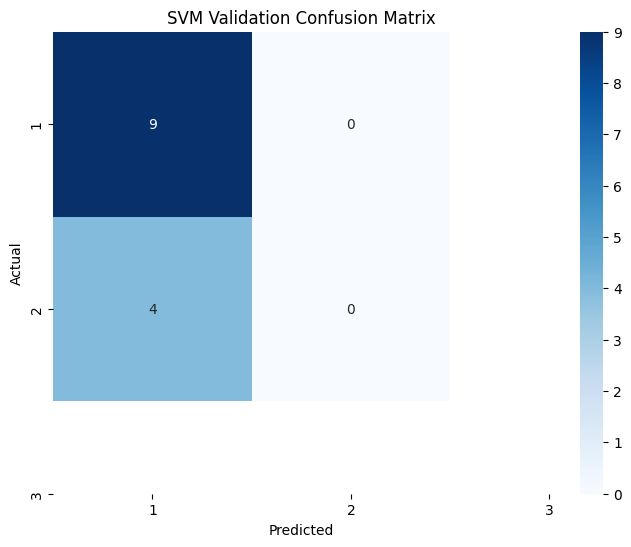

In [1377]:
conf_matrix_svm = confusion_matrix(y_val, y_val_pred_svm)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_svm, annot=True, fmt="d", cmap="Blues", xticklabels=[1, 2, 3], yticklabels=[1, 2, 3])
plt.title("SVM Validation Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

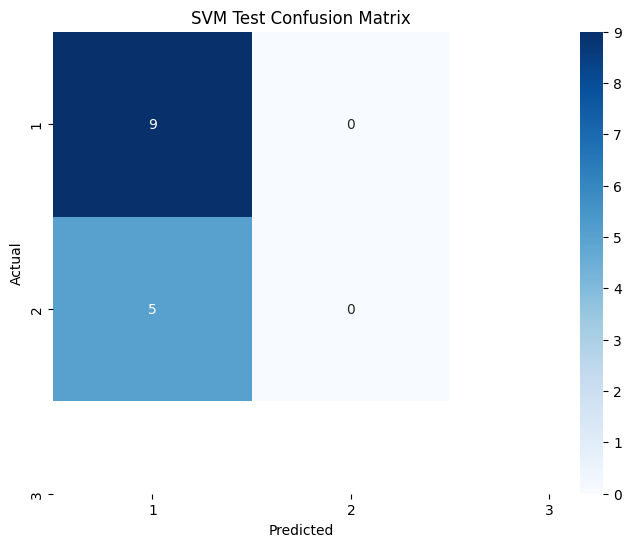

In [1378]:
conf_matrix_svm = confusion_matrix(y_test, y_test_pred_svm)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_svm, annot=True, fmt="d", cmap="Blues", xticklabels=[1, 2, 3], yticklabels=[1, 2, 3])
plt.title("SVM Test Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

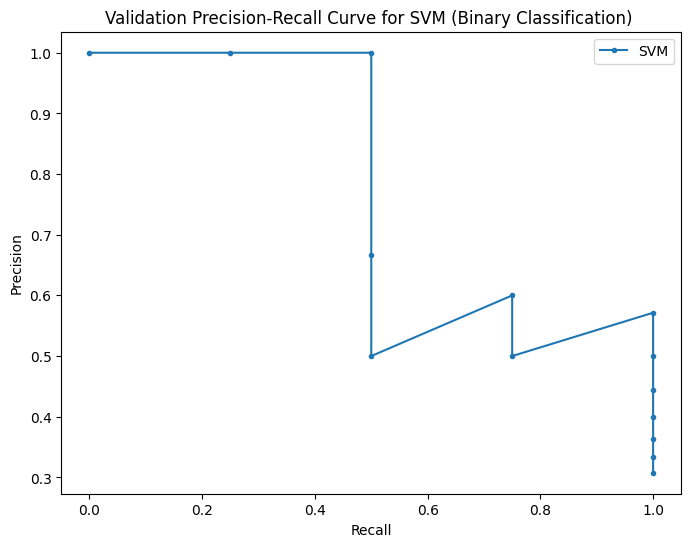

In [1379]:
y_score_svm = best_model.predict_proba(X_val)[:, 1]

precision, recall, _ = precision_recall_curve(y_val, y_score_svm)

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, marker='.', label='SVM')
plt.title('Validation Precision-Recall Curve for SVM (Binary Classification) ')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend(loc='best')
plt.show()

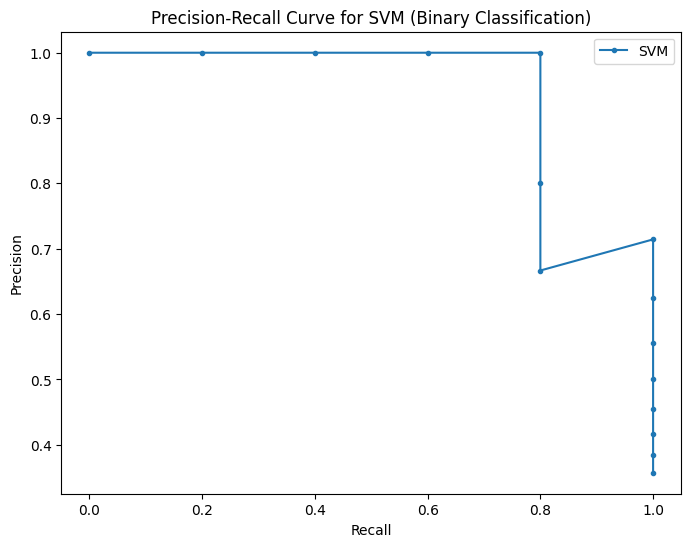

In [1380]:
y_score_svm = best_model.predict_proba(X_test)[:, 1]

precision, recall, _ = precision_recall_curve(y_test, y_score_svm)

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, marker='.', label='SVM')
plt.title('Precision-Recall Curve for SVM (Binary Classification)')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend(loc='best')
plt.show()